In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [7]:
t_pts = 500
X, Y = datasets.make_circles(n_samples = t_pts, random_state = 123, noise = 0.1, factor = 0.2)

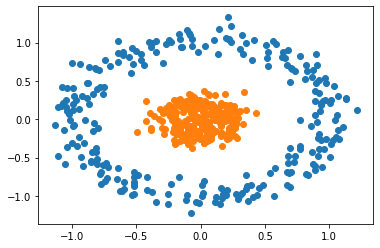

In [8]:
plt.scatter(X[Y==0, 0], X[Y==0,1])
plt.scatter(X[Y==1, 0], X[Y==1,1])

In [17]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr = 0.01 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 387us/step - loss: 0.7153 - accuracy: 0.3900
Epoch 2/100
500/500 [==============================] - 0s 56us/step - loss: 0.6982 - accuracy: 0.3620
Epoch 3/100
500/500 [==============================] - 0s 58us/step - loss: 0.6963 - accuracy: 0.5860
Epoch 4/100
500/500 [==============================] - 0s 56us/step - loss: 0.6956 - accuracy: 0.6480
Epoch 5/100
500/500 [==============================] - 0s 59us/step - loss: 0.6947 - accuracy: 0.6000
Epoch 6/100
500/500 [==============================] - 0s 56us/step - loss: 0.6944 - accuracy: 0.5640
Epoch 7/100
500/500 [==============================] - 0s 58us/step - loss: 0.6939 - accuracy: 0.5140
Epoch 8/100
500/500 [==============================] - 0s 55us/step - loss: 0.6936 - accuracy: 0.5140
Epoch 9/100
500/500 [==============================] - 0s 59us/step - loss: 0.6936 - accuracy: 0.5520
Epoch 10/100
500/500 [==============================] - 0s 62us/step - loss: 0.69

500/500 [==============================] - 0s 57us/step - loss: 0.1352 - accuracy: 1.0000
Epoch 81/100
500/500 [==============================] - 0s 55us/step - loss: 0.1310 - accuracy: 1.0000
Epoch 82/100
500/500 [==============================] - 0s 52us/step - loss: 0.1270 - accuracy: 1.0000
Epoch 83/100
500/500 [==============================] - 0s 59us/step - loss: 0.1233 - accuracy: 1.0000
Epoch 84/100
500/500 [==============================] - 0s 55us/step - loss: 0.1197 - accuracy: 1.0000
Epoch 85/100
500/500 [==============================] - 0s 66us/step - loss: 0.1163 - accuracy: 1.0000
Epoch 86/100
500/500 [==============================] - 0s 64us/step - loss: 0.1129 - accuracy: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 55us/step - loss: 0.1098 - accuracy: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 68us/step - loss: 0.1069 - accuracy: 1.0000
Epoch 89/100
500/500 [==============================] - 0s 52us/step - loss: 0.1040 - 

Text(0.5, 0, 'epoch')

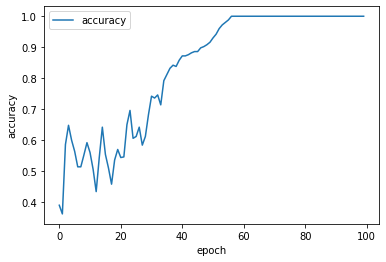

In [19]:
plt.plot(history.history['accuracy'])

plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

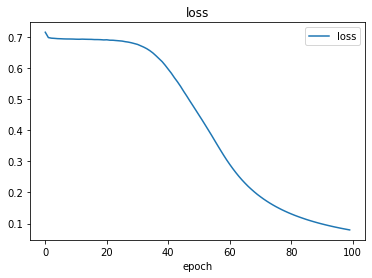

In [20]:
plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [22]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

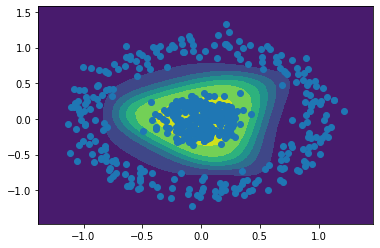

In [24]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:t_pts,0], X[:t_pts,1])
plt.scatter(X[t_pts:,0], X[t_pts:,1])

Prediction is:  [[0.17521012]]


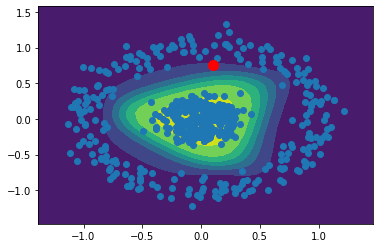

In [28]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:t_pts,0], X[:t_pts,1])
plt.scatter(X[t_pts:,0], X[t_pts:,1])
x = 0.1
y = 0.75

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ",prediction)